# Project Description

**The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades**

# Columns Description-  total 43 columns

### Seat No : The enrolled number of candidate that took the exams

**CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.**

**All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam**

**Predict - CGPA of a student based on different grades in four years.**

In [38]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import joblib

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")


In [3]:
df.head(20) #Displaying the first 20 rows

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0   CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1   CS-97002      A      D     D+         D     B-      C      D      A   
2   CS-97003      A      B      A        B-     B+      A     B-     B+   
3   CS-97004      D     C+     D+         D      D     A-     D+     C-   
4   CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5   CS-97006      A     B-      B        D+     C+     A-     C+      B   
6   CS-97007     B-     C-     A-         D     A-      B      A     B+   
7   CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8   CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9   CS-97010      A      B     C+         B      B     A-      C     B-   
10  CS-97011     A-     B-     B+        C-     C-     B-     C+     B-   
11  CS-97012     A-      C     A-        C+     C-      A     B-     B+   
12  CS-97013      B      C     A-         C     B-      B     D+      C   
13  CS-97014      A     C-     A-        C-      B     A-     C+     A-   
14  CS-97015      A      C     A-        C+     A-      A     B-     A-   
15  CS-97016     A-     C-     B-         D     B-     B+     B-     A-   
16  CS-97017     A-     C-      A        D+     A-      A      B     A-   
17  CS-97018     B-     C-      C         D      D     C+     D+      B   
18  CS-97019      A     C-      A        C+     A-      A     A-      A   
19  CS-97020     B+      C     A-        C-     A-     B+     A-     A-   

   EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412  \
0      B-  ...     C-     C-     C-     C-     A-      A     C-      B     A-   
1      D+  ...     D+      D      C      D     A-     B-      C      C      B   
2      A-  ...      B      B      A      C      A      A      A     A-      A   
3       D  ...     D+      C     D+     C-     B-      B     C+     C+     C+   
4       A  ...     B-     B+     B+     B-     A-      A     A-     A-      A   
5      B+  ...      C     B-     C+     C+     A-     A-     B+     B-      B   
6      A-  ...     B-      C     B+     B-      A     A-     B+     B+      A   
7       B  ...     D+     B+     B+      C      A     B+     A-     A-     A-   
8      B+  ...     B+      B     B-     C+      A     A-     B+     A-      A   
9      A-  ...     C+     B-     B+     B-      A      A     A-      B      A   
10      A  ...      C     B-     C-     C-      B     B+     B-     C-     B+   
11     A-  ...     A-     B-     B+      C      A     A-     B-     C+     A-   
12     B+  ...     C-      C     C-      C      A     A-     B-     A-     B+   
13     A-  ...      B     A-     A-     B+     A-      A      A     A-      A   
14     A-  ...     C+     A-     A-     B+     A-     A+      A      A      A   
15      B  ...      B      C     B-     C+     A-     A-     C+     C-     A-   
16     A-  ...      C     B-      B     C+     B+     A-     B-      B     A-   
17     B+  ...      D     D+     D+      D     A-      C     C-     D+     C-   
18      A  ...     B-     A-     A-     B-     A-      A     A-     A-      A   
19      A  ...      C     B+     A-     B+     A-     A+     A-     A-      A   

     CGPA  
0   2.205  
1   2.008  
2   3.608  
3   1.906  
4   3.448  
5   3.026  
6   2.957  
7   3.043  
8   3.358  
9   3.247  
10  2.681  
11  3.281  
12  2.792  
13  3.523  
14  3.443  
15  2.777  
16  3.248  
17  1.787  
18  3.572  
19  3.483  

[20 rows x 43 columns]

In [4]:
df.tail(20) #Displaying the last 20 rows

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
551  CS-97552      A     B-      A        B+      A      A     B+     B+   
552  CS-97553     B-      C      A        B+     C-      A      B      C   
553  CS-97554      A      B     A+        C+      A      A     A-      A   
554  CS-97555     B+     C-     A+        C+      B     A-     B+      C   
555  CS-97556     B-      C      A        B-     C-      B      B     B-   
556  CS-97557      A     B+     A+         A      A     B+     A-      B   
557  CS-97558     B+     C+      B        A-     B-     B+     B+      C   
558  CS-97559     A-     B-      A         A     A-      A     B+     A-   
559  CS-97560     A-     C+      A         B      B     A-     C+      D   
560  CS-97561     B+     C-      A        D+     C+     A-     C-     C+   
561  CS-97562     B-      B     A-        B+     B-     B+     A-      A   
562  CS-97563      B      B      A         C      B     B+      B     C-   
563  CS-97564     A-      B      A        D+     B+     A-      C      A   
564  CS-97565     A-      D      A         C     B+     B+      C     A-   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
551      A  ...     B+     B-      A      C     B+      C     B-      C   
552      B  ...     C+      C     B+      F     D+     C-      B      D   
553     B-  ...     A-     B+      A     B+      A     C+     A-      B   
554     B+  ...     A-     C+      A      B      B      B     B+     C-   
555     C-  ...      D     C-      B     C-     C+     B-     B+     D+   
556     A-  ...      A     A-      A     B+      A      B      A     B+   
557      B  ...     C-      C     A-      C     C+     D+      B     C-   
558     B+  ...     B+     B+      A      B      C      D     A-     D+   
559      B  ...     B+     B-      A     A-      A      C     B+     B+   
560     C+  ...     B+      C     B+     C-     C-      F      C      D   
561      B  ...     B+     B-     B+     D+     C+     B-     B+      C   
562     B+  ...     A-      B     B+     B+     B+     C+     A-     D+   
563     C+  ...     B+      C     B+     C-     C-      C      F      D   
564     B-  ...      B     C+     B+     D+      C     C-      B      C   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
551     B-  3.218  
552     D+  2.406  
553     A-  3.491  
554      B  2.880  
555     B-  2.206  
556      A  3.624  
557      C  2.429  
558      C  3.172  
559     A-  3.226  
560     C-  2.370  
561     C+  2.828  
562     C+  2.821  
563      C  2.612  
564     B-  2.607  
565    NaN  0.800  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[20 rows x 43 columns]

**==>This dataset contains the details of grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.**

**==>This dataset has both categorical(all are features) and numerical data(Target variable).**

**==>CGPA column is the target variable because it represents measurable outcomes using the other variables.**

# We have to Predict - CGPA of a student based on different grades in four years.

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)¶

In [5]:
df.shape #checking the dimension of the dataset

(571, 43)

**This Dataset contains 571 rows and 43 Columns**

In [6]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


**From this CGPA column is our target variable ,then others are features(independent variable)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

**There are two data types presented in the dataset one is object(String) and anathor one is float64 that is our target variable**

**some columns have null values,we need to look further analysis**

In [8]:
#Checking the null values

missing_values=df.isna().sum().to_frame("Null values")

missing_values["Percentage of Missing values"]=round(missing_values['Null values']/len(df)*100,2)

missing_values

Null values  Percentage of Missing values
Seat No.             0                          0.00
PH-121               0                          0.00
HS-101               0                          0.00
CY-105               1                          0.18
HS-105/12            1                          0.18
MT-111               2                          0.35
CS-105               0                          0.00
CS-106               2                          0.35
EL-102               2                          0.35
EE-119               2                          0.35
ME-107               2                          0.35
CS-107               2                          0.35
HS-205/20            5                          0.88
MT-222               5                          0.88
EE-222               7                          1.23
MT-224               7                          1.23
CS-210               7                          1.23
CS-211               5                          0.88
CS-203               5                          0.88
CS-214               6                          1.05
EE-217               6                          1.05
CS-212               6                          1.05
CS-215               6                          1.05
MT-331               9                          1.58
EF-303              10                          1.75
HS-304              10                          1.75
CS-301              10                          1.75
CS-302              10                          1.75
TC-383              10                          1.75
MT-442              10                          1.75
EL-332               9                          1.58
CS-318               9                          1.58
CS-306               9                          1.58
CS-312              10                          1.75
CS-317              12                          2.10
CS-403              12                          2.10
CS-421              12                          2.10
CS-406              85                         14.89
CS-414              13                          2.28
CS-419              13                          2.28
CS-423              14                          2.45
CS-412              79                         13.84
CGPA                 0                          0.00

**==>The dataset has null values in several columns but in some columns the null values percentage is high we will deal this with imputation method ,our columns all are categorical,we can impute the missing values with most frequent value**



<Axes: >

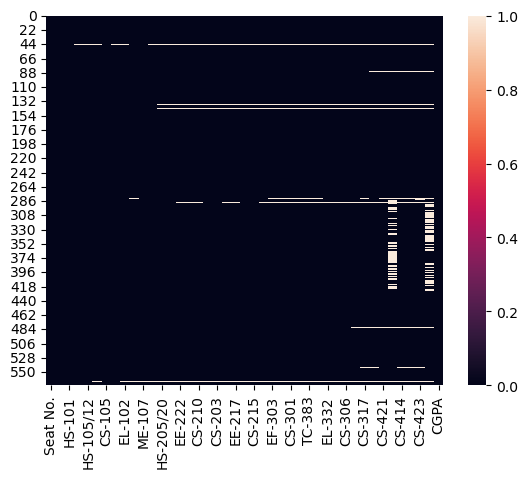

In [9]:
#Let's visualize using heatmap
sns.heatmap(df.isnull())

**From the Graph,The row contains more missing values than others,we will deal this**

In [10]:
#Rows with missing values
df_row_missing_values=df[df.isna().any(axis=1)]
df_row_missing_values

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
60   CS-97061      C     B+     WU        D+     C-     B-      F      D   
86   CS-97087      D      D     D+        B-      F      D      D      D   
91   CS-97092     WU     C-      D         D     WU      D      D      D   
137  CS-97138     C-     C+     WU        WU     WU      B     WU     WU   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
423  CS-97424      D     D+      D         D     C-      C     C+     B-   
424  CS-97425     C-     D+     B-        C+     D+     C-     A-     C-   
481  CS-97482     B-     A-     C+         D      B      B     A-     A-   
543  CS-97544      A      B      A        A-     A-      A     B+     B+   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
44      D+  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
60      A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
86      D+  ...     D+      D    NaN    NaN    NaN    NaN    NaN    NaN   
91       C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
137     A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
423      C  ...      D      D     D+      D      D      W      C      B   
424     D+  ...      W      C     B-      F     D+      W      D      B   
481      C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
543     B+  ...     WU    NaN    NaN      W     WU    NaN    NaN    NaN   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    CS-412   CGPA  
44     NaN  1.493  
60     NaN  2.418  
86     NaN  1.261  
91     NaN  1.380  
137    NaN  2.653  
..     ...    ...  
423    NaN  1.747  
424    NaN  1.835  
481    NaN  1.896  
543      W  3.607  
565    NaN  0.800  

[154 rows x 43 columns]

**The dataset has 154 rows with missing values,we will delete rows which has more null values**

# Dropping rows with many missing values

In [11]:
null_count_per_row=df.isna().sum(axis=1)
df['Null_Count']=null_count_per_row  #Assigning a new column to drop rows which has many missing values

In [12]:
null_count_per_row.sort_values(ascending=False).head(15) #first 15 rows with more null values

44     36
565    35
142    31
143    30
137    30
60     24
288    24
281    20
91     19
282    14
481     9
86      7
543     5
382     1
383     1
dtype: int64

**Dropping the first 10 columns is the best way to do because filling the null values for that rows will affect our performance.**

In [13]:
df=df[df['Null_Count']<=9] #Dropping rows which has null values more than 10 in the row

In [14]:
df.shape #Dimension of the dataset after removing rows

(561, 44)

In [15]:
#Checking the null values

missing_values=df.isna().sum().to_frame("Null values")

missing_values["Percentage of Missing values"]=round(missing_values['Null values']/len(df)*100,2)

missing_values[missing_values['Null values']>0] #only columns with missing values

Null values  Percentage of Missing values
CS-312            1                          0.18
CS-317            2                          0.36
CS-403            3                          0.53
CS-421            2                          0.36
CS-406           75                         13.37
CS-414            3                          0.53
CS-419            3                          0.53
CS-423            4                          0.71
CS-412           69                         12.30

**After dropping the rows with more missing values,we have only 10 features with missing values**

# Imputation(to fill Missing values)

In [16]:
#Selecting columns with missing values
columns_with_missing=df.columns[df.isnull().any()]
columns_with_missing

Index(['CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419',
       'CS-423', 'CS-412'],
      dtype='object')

In [17]:
#For each column we use the mode to replace the missing value
for column in columns_with_missing:
    mode_value=df[column].mode()[0]   #Get the most frequent value
    df[column].fillna(mode_value,inplace=True)

In [18]:
#Checking the null values

missing_values=df.isna().sum().to_frame("Null values")

missing_values["Percentage of Missing values"]=round(missing_values['Null values']/len(df)*100,2)

missing_values[missing_values['Null values']>0] #only columns with missing values

Empty DataFrame
Columns: [Null values, Percentage of Missing values]
Index: []

In [19]:
df.drop('Null_Count',axis=1,inplace=True)  #Dropping Null_count column

# Duplicate Rows

In [20]:
print("Total no. of duplicated rows:",df.duplicated().sum())

Total no. of duplicated rows: 0


**The dataset doesn't have duplicate values**

# Unique value Analysis

In [21]:
for i in df.columns:
    print(df[i].value_counts()) #cheching the value count of each column
    print('\n')

Seat No.
CS-97001    1
CS-97387    1
CS-97381    1
CS-97382    1
CS-97383    1
           ..
CS-97188    1
CS-97187    1
CS-97186    1
CS-97185    1
CS-97571    1
Name: count, Length: 561, dtype: int64


PH-121
A-    112
A     111
B+     61
B      57
B-     55
D      41
C      32
C+     30
D+     22
A+     22
C-     18
Name: count, dtype: int64


HS-101
A-    82
B-    77
C     67
B     63
B+    58
C-    48
C+    45
D     44
A     38
D+    35
A+     4
Name: count, dtype: int64


CY-105
A     177
A-    120
B+     50
B      48
B-     42
A+     31
D      28
C      19
C+     17
C-     16
D+     13
Name: count, dtype: int64


HS-105/12
A     96
A-    74
B+    70
B     57
D     43
C     40
B-    40
C+    39
C-    35
A+    34
D+    33
Name: count, dtype: int64


MT-111
A-    104
A      99
B-     70
B+     62
B      55
C-     38
C+     33
C      30
D      25
A+     23
D+     21
F       1
Name: count, dtype: int64


CS-105
A     151
A-    133
B+     60
B      50
A+     43
B-     36
C+     23
C  

In [22]:
df.nunique().to_frame('No. of unique values') #Number of unique values in each feature and target

No. of unique values
Seat No.                    561
PH-121                       11
HS-101                       11
CY-105                       11
HS-105/12                    11
MT-111                       12
CS-105                       11
CS-106                       11
EL-102                       11
EE-119                       11
ME-107                       11
CS-107                       11
HS-205/20                    11
MT-222                       12
EE-222                       12
MT-224                       12
CS-210                       12
CS-211                       12
CS-203                       11
CS-214                       11
EE-217                       12
CS-212                       11
CS-215                       11
MT-331                       12
EF-303                       12
HS-304                       14
CS-301                       12
CS-302                       11
TC-383                       12
MT-442                       12
EL-332                       13
CS-318                       14
CS-306                       13
CS-312                       14
CS-317                       12
CS-403                       11
CS-421                       13
CS-406                       14
CS-414                       13
CS-419                       12
CS-423                       12
CS-412                       13
CGPA                        482

**From Above analysis:**
    
   **1)Seat No. column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. So we can drop it.**
   
   **2)CGPA has 482 unique values of 561 total ,so it is the regression problem because it contains continous and numerical**
   
   **3)Other 41 features have unique values between 11 an 14,we have to encode this for model**

In [23]:
#Dropping the column Seat No.(reason for it explained previously)
df.drop(['Seat No.'],axis=1,inplace=True)
df.head(10)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0     B-     D+     C-         C     C-     D+      D     C-     B-     C-   
1      A      D     D+         D     B-      C      D      A     D+      D   
2      A      B      A        B-     B+      A     B-     B+     A-     A-   
3      D     C+     D+         D      D     A-     D+     C-      D     C+   
4     A-     A-     A-        B+      A      A     A-     B+      A     A-   
5      A     B-      B        D+     C+     A-     C+      B     B+     B+   
6     B-     C-     A-         D     A-      B      A     B+     A-     B+   
7     B+     B+     C+         C      C     A-     C-     A-      B     A-   
8     A-      C     A-        D+      B     A-     A-     A-     B+     A-   
9      A      B     C+         B      B     A-      C     B-     A-      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  
5  ...      C     B-     C+     C+     A-     A-     B+     B-      B  3.026  
6  ...     B-      C     B+     B-      A     A-     B+     B+      A  2.957  
7  ...     D+     B+     B+      C      A     B+     A-     A-     A-  3.043  
8  ...     B+      B     B-     C+      A     A-     B+     A-      A  3.358  
9  ...     C+     B-     B+     B-      A      A     A-      B      A  3.247  

[10 rows x 42 columns]

In [24]:
df.shape #checking the dimension of the new dataset

(561, 42)

In [25]:
print(f"Columns Names:{df.columns}") #columns of the new dataset

Columns Names:Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')


# Summary Statistics of the Numerical variable

In [26]:
df.describe()

CGPA
count  561.000000
mean     2.977501
std      0.594160
min      1.261000
25%      2.564000
50%      3.042000
75%      3.458000
max      3.985000

**There is no negative value present**

**There is no missing values**

**The median(50%)is greater than The mean value in CGPA(Target Variable) which means the data is skewed to left.**

**The minimum value of CGPA is 1.261 and the maximum value is 3.985**

# Summary Statistics of the Non-Numerical variable

In [27]:
df.describe(exclude=np.number)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
count     561    561    561       561    561    561    561    561    561   
unique     11     11     11        11     12     11     11     11     11   
top        A-     A-      A         A     A-      A     A-     A-     A-   
freq      112     82    177        96    104    151    116    105    134   

       ME-107  ... CS-306 CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419  \
count     561  ...    561    561    561    561    561    561    561    561   
unique     11  ...     13     14     12     11     13     14     13     12   
top        A-  ...     A-     A+     B-      A      B     A-      A     A-   
freq       79  ...    120     94     81    136     88    252    179    123   

       CS-423 CS-412  
count     561    561  
unique     12     13  
top        A-     A-  
freq      126    226  

[4 rows x 41 columns]

**There is no missing values**

**There are 41 indepedent features have unique values between 11 and 14**

# Data Visulization(Grapical Analysis)

# Univarite Analysis

# Target feature

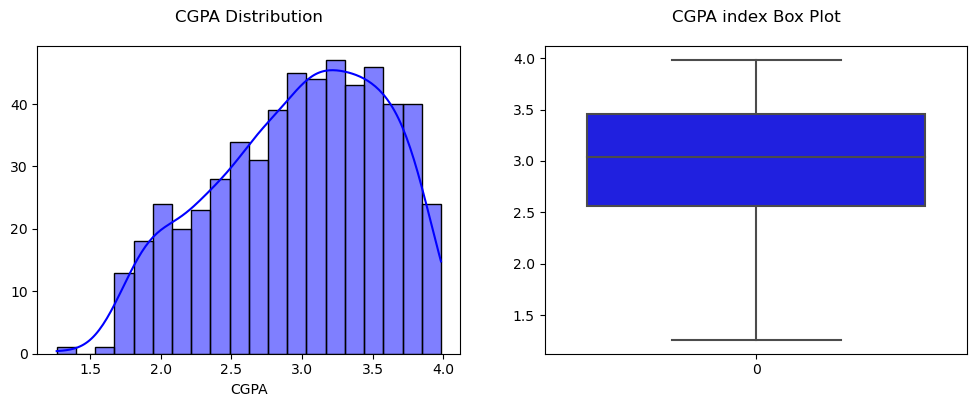

Skewness of CGPA:  -0.3554277377610981


In [28]:
#Visualizing target distribution
fig,axes=plt.subplots(1,2,figsize=(12,4))

sns.histplot(df['CGPA'],kde=True,bins=20,ax=axes[0],color='blue')
sns.boxplot(df['CGPA'],ax=axes[1],color='blue')

axes[0].set_title('CGPA Distribution',size=12,y=1.05)
axes[0].set_ylabel('',size=10,labelpad=8)

axes[1].set_title('CGPA index Box Plot',size=12,y=1.05 )

plt.show()

#Showing the skewness of CGPA
print(f"Skewness of CGPA:  {df.CGPA.skew()}")

**The distribution of CGPA is skewed to the left.There are not outliers present in the Box Plot ofCGPA**

# Features(Independent variable)

In [29]:
categorical_column=df.columns[:-1]
categorical_column

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [32]:
#Get all the possible unique values in the dataset features
array=[]

for col in categorical_column:
    arr.extend(df[col].unique())

pd.Series(arr).unique()


array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F',
       'WU', 'W'], dtype=object)

In [33]:
#Transforming this array into ordered categories

ordered_category=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','F','WU','W']


for col in categorical_column:
    df[col]=pd.Categorical(df[col],categories=ordered_category,ordered=True)

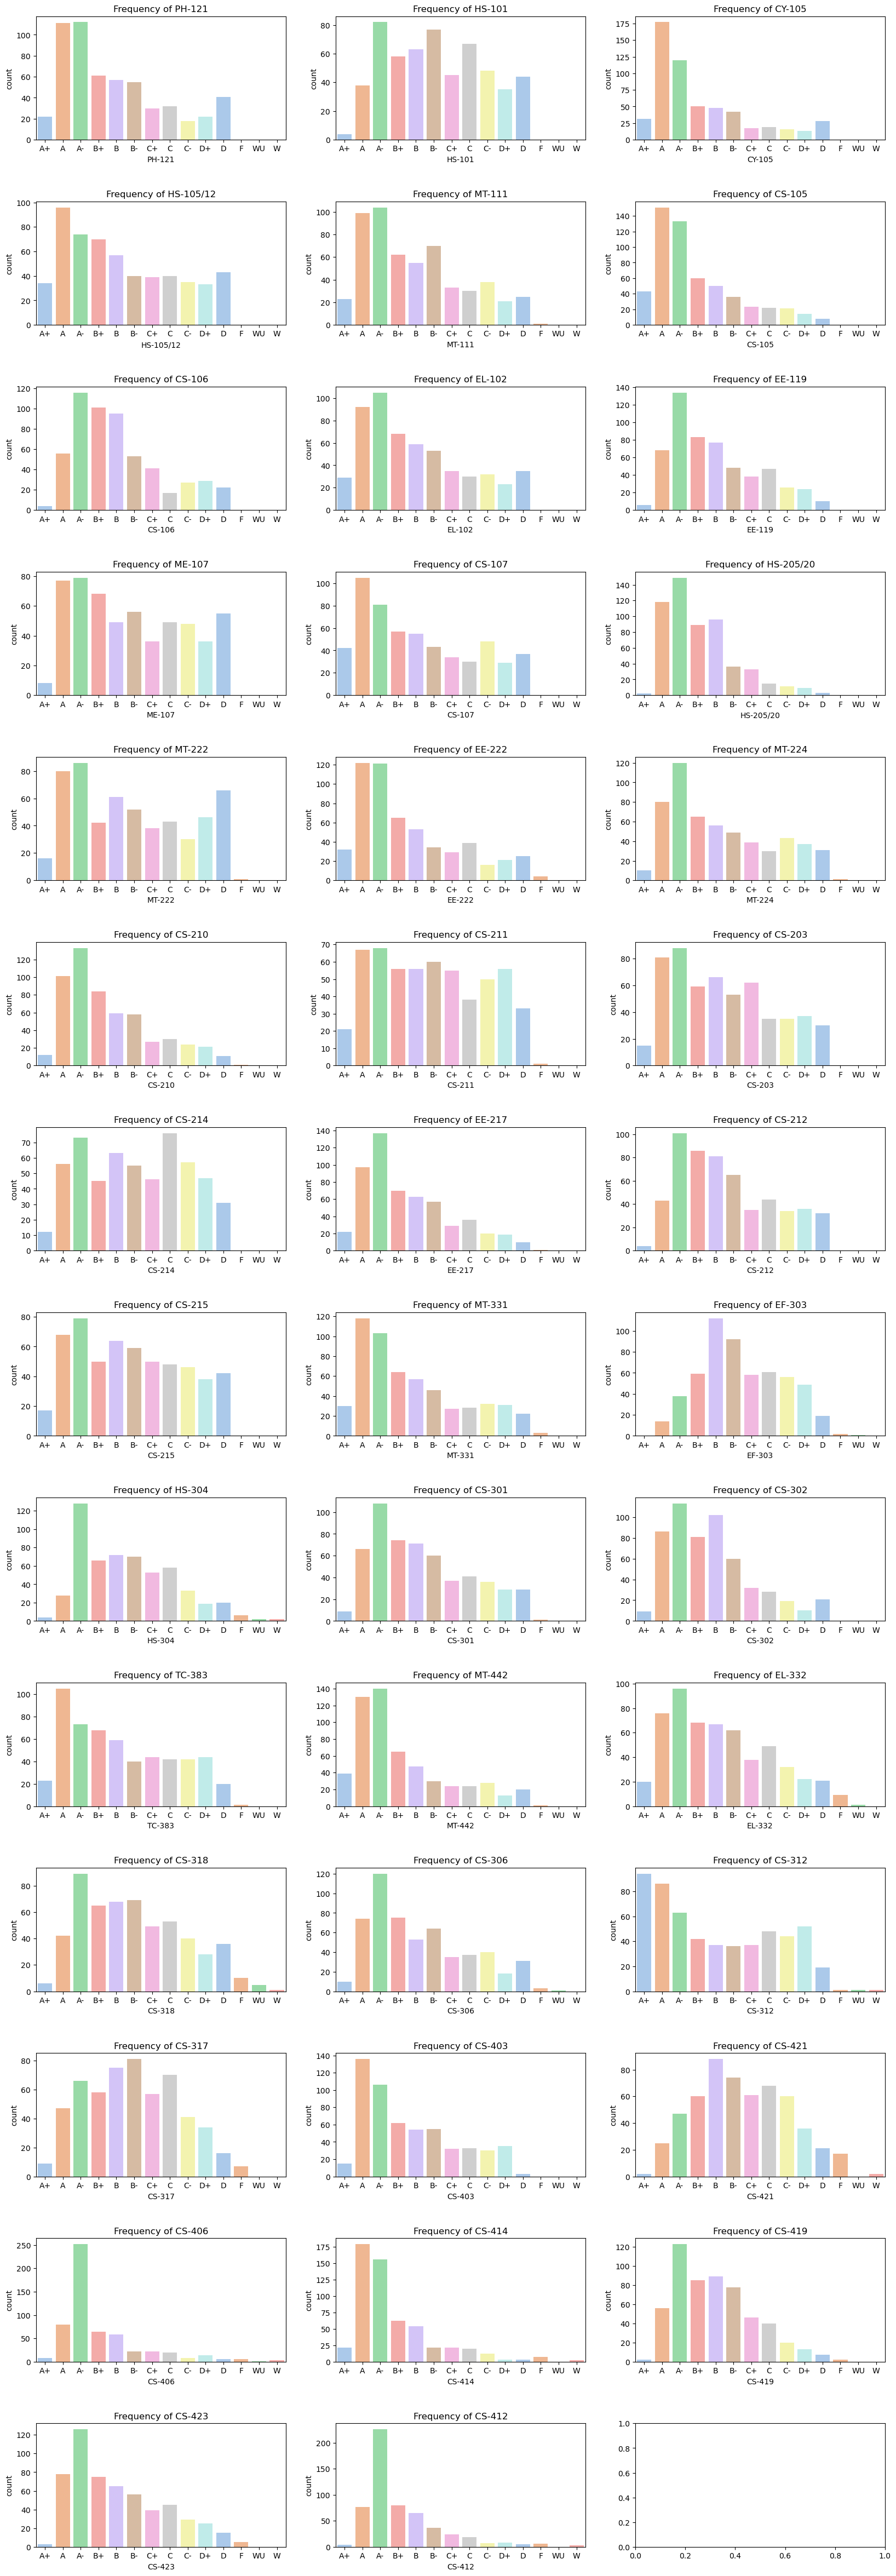

In [35]:
#Visualize the categorical variables

fig,axs=plt.subplots(14,3,figsize=(20,60))


for ax,column in zip(axs.flat,categorical_column):
    sns.countplot(data=df,x=column,ax=ax,palette='pastel')
    ax.set_title(f"Frequency of {column}")
    
plt.subplots_adjust(hspace=0.5)
plt.show()

**There is a trend for A and A- grades in most features**

# Bivariate Analysis(comparing each feature with target variable)

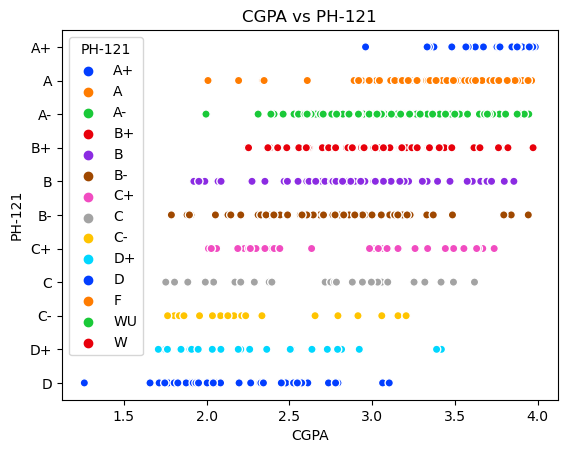

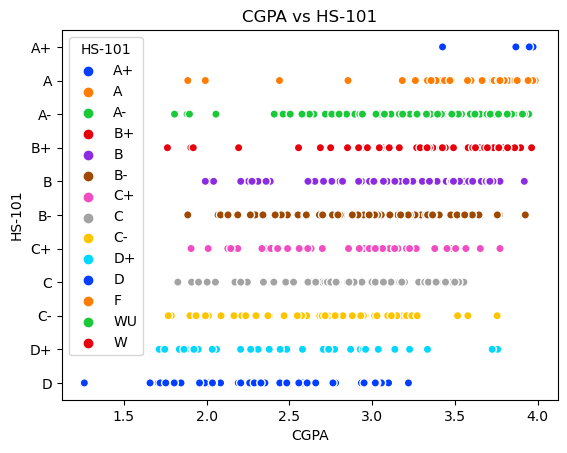

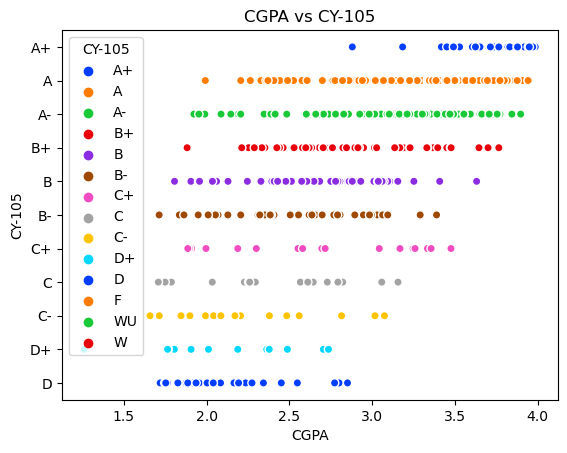

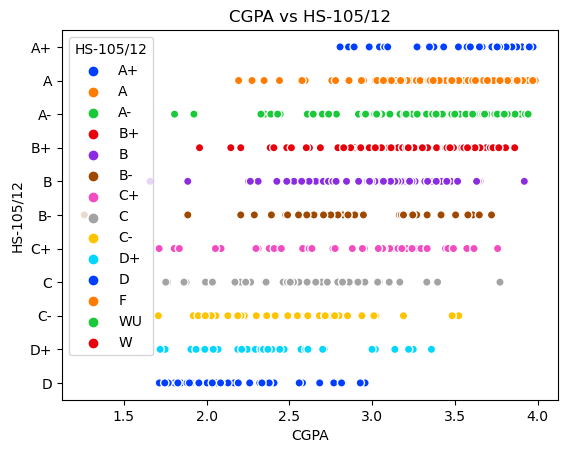

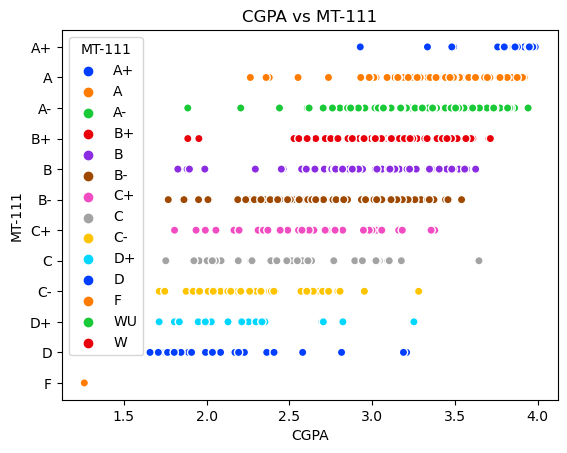

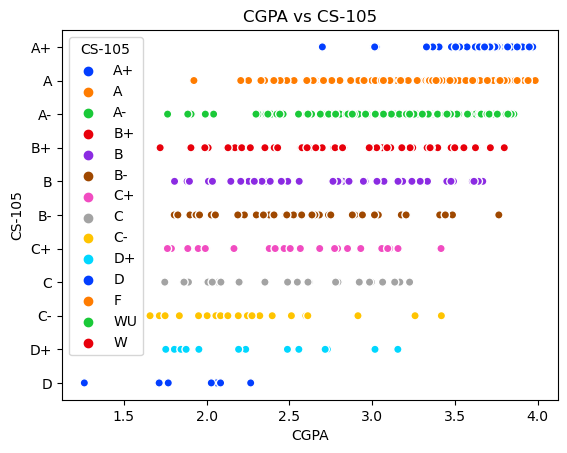

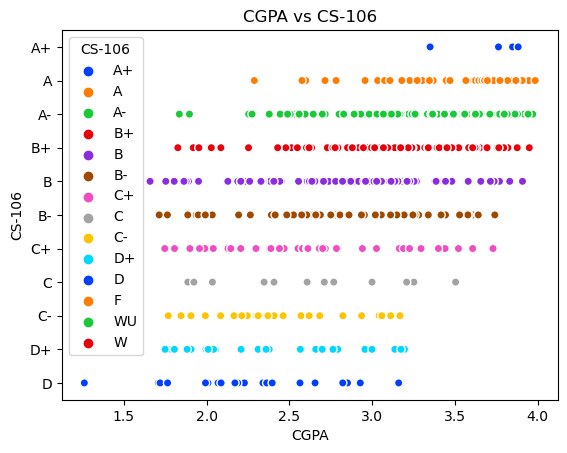

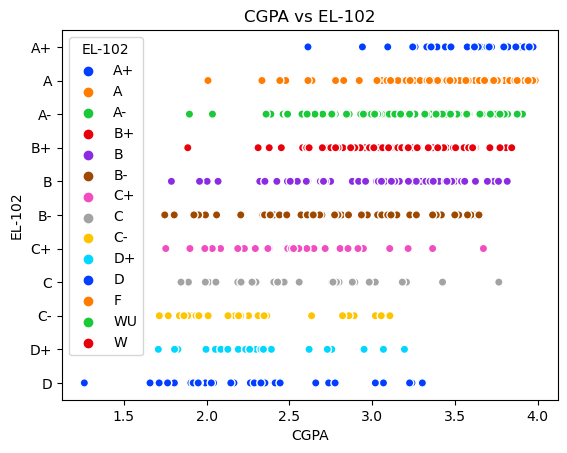

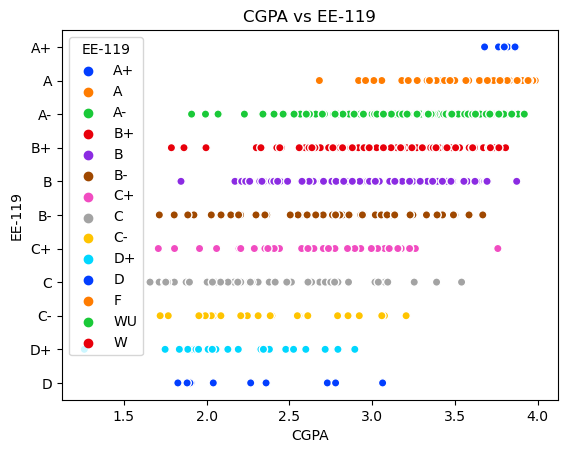

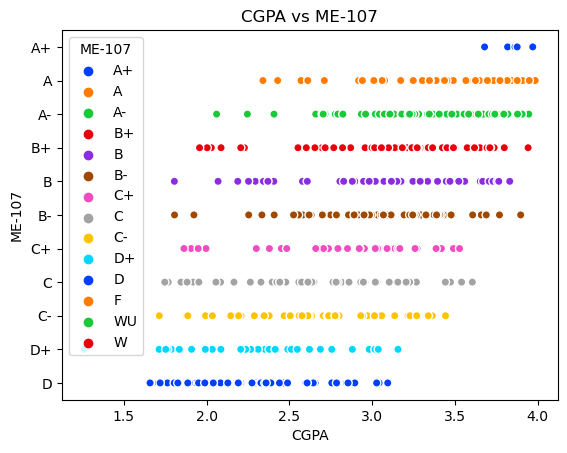

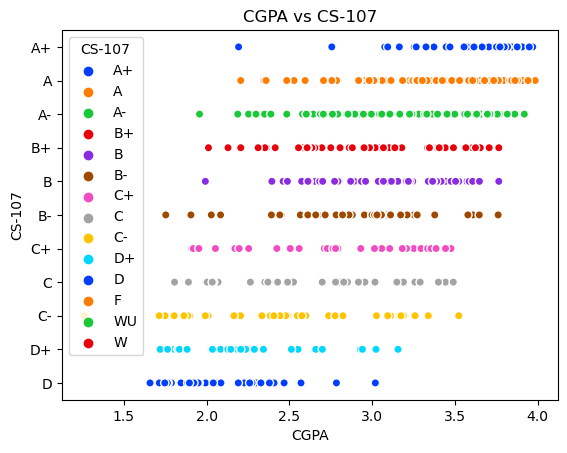

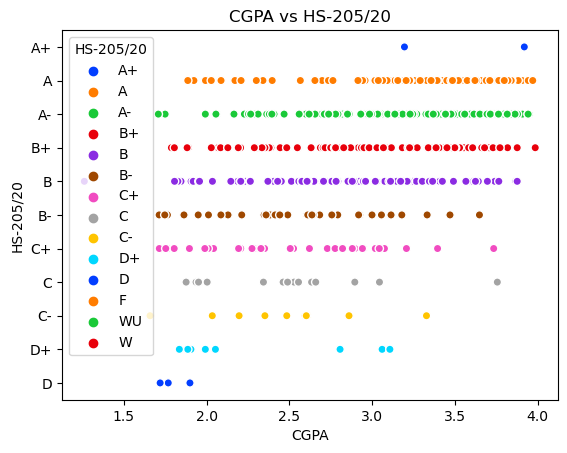

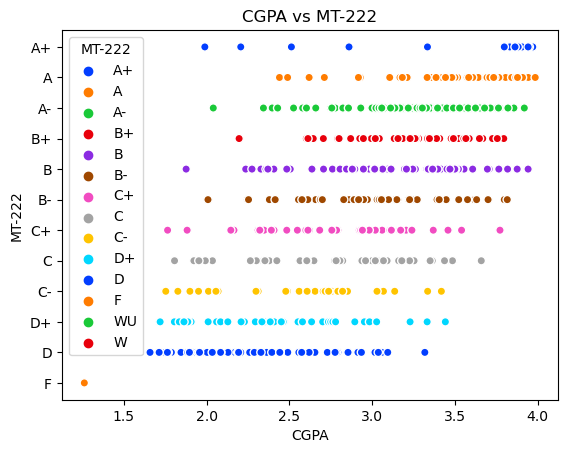

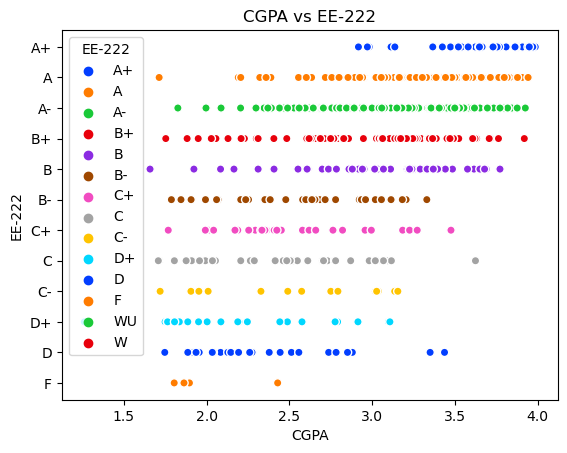

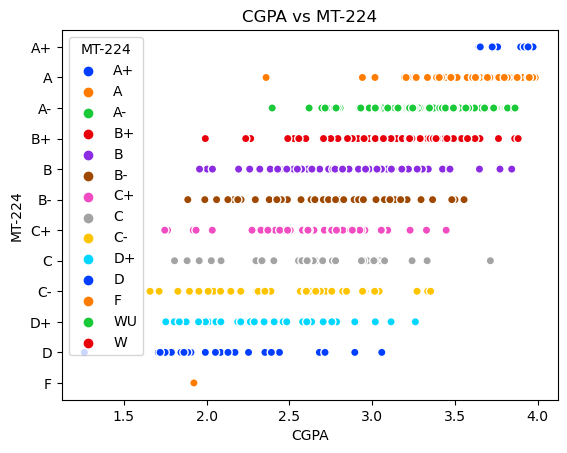

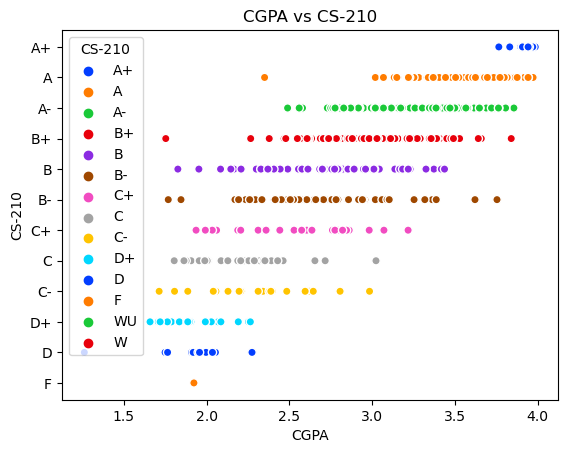

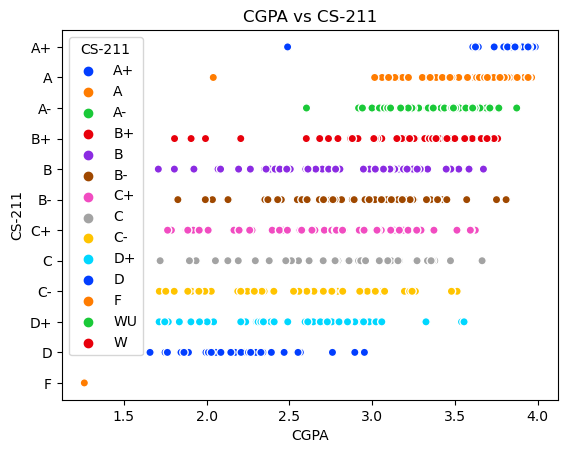

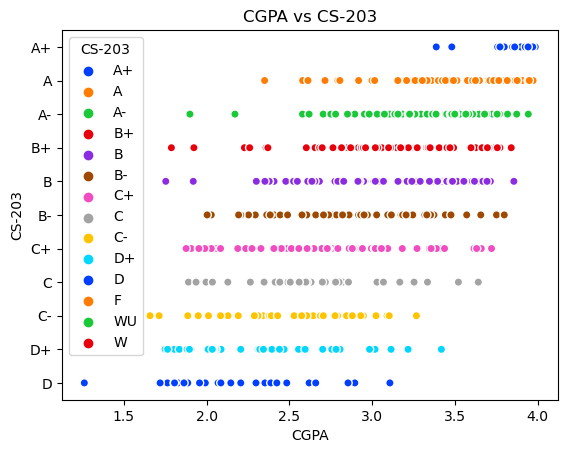

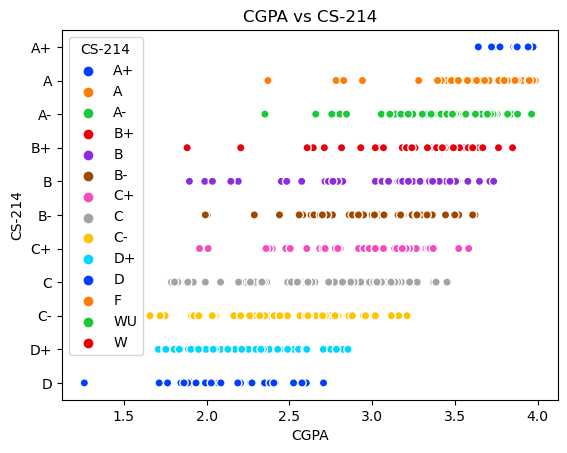

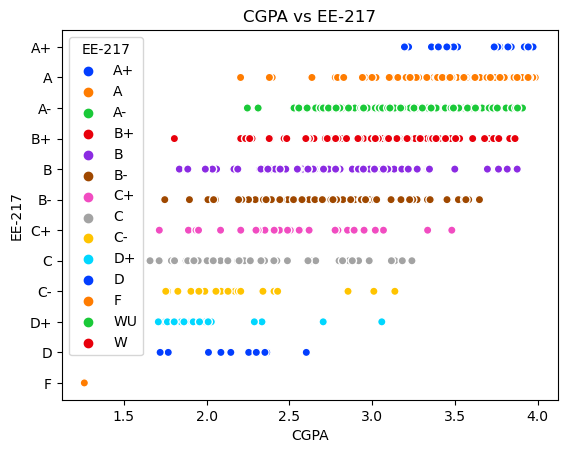

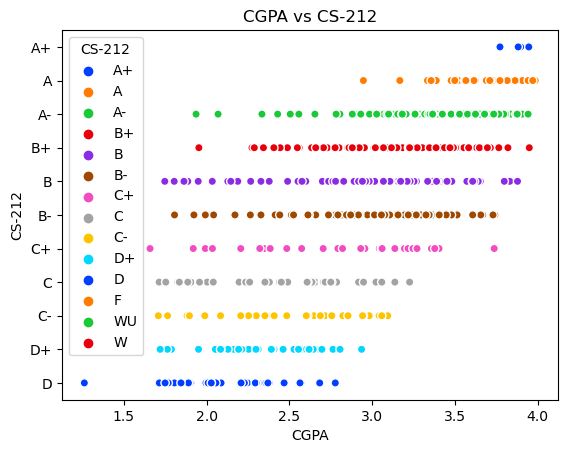

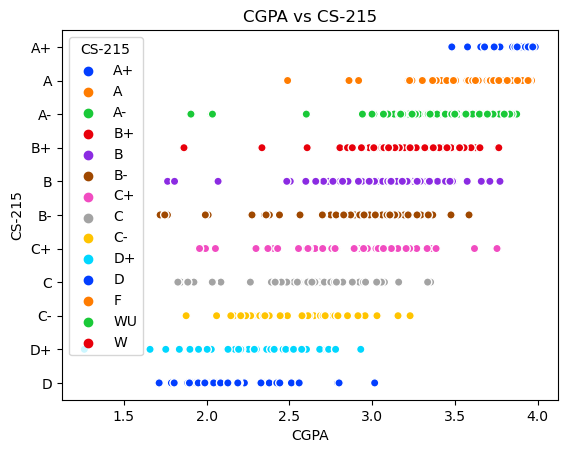

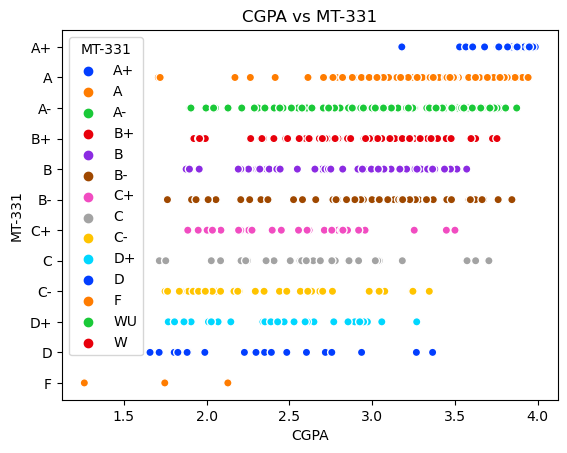

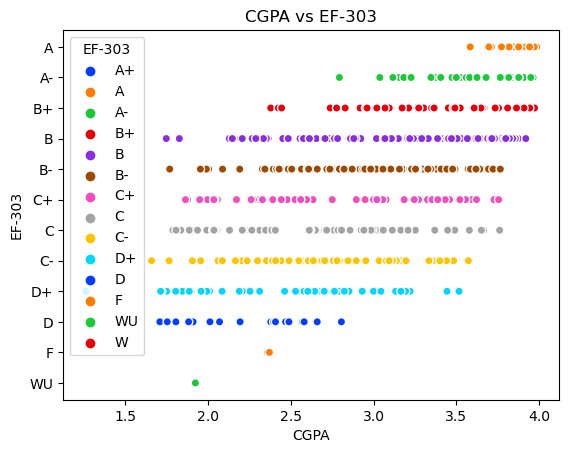

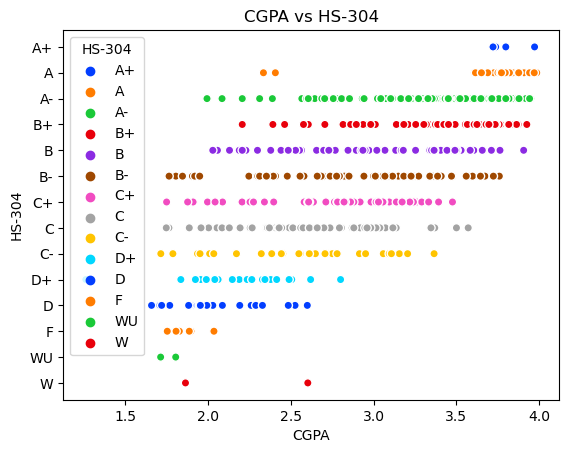

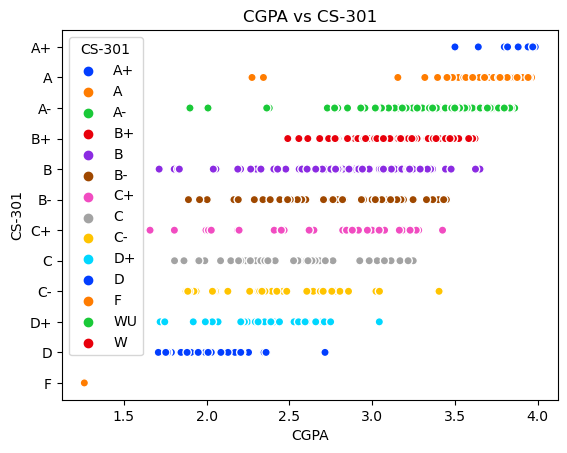

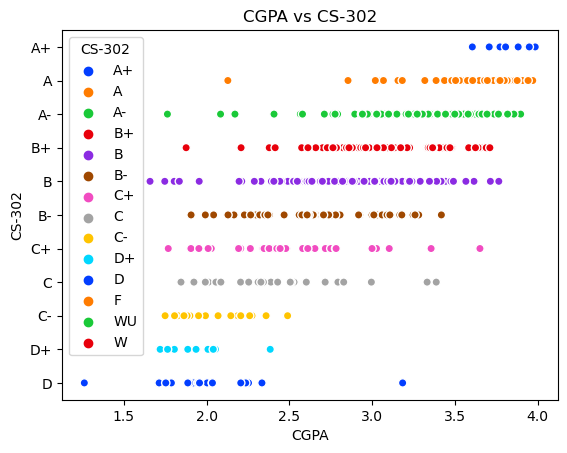

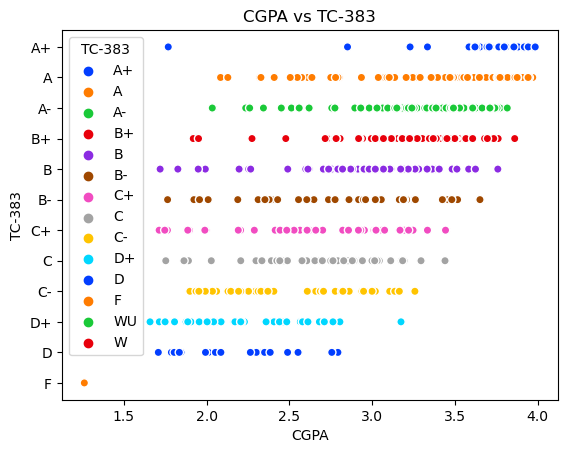

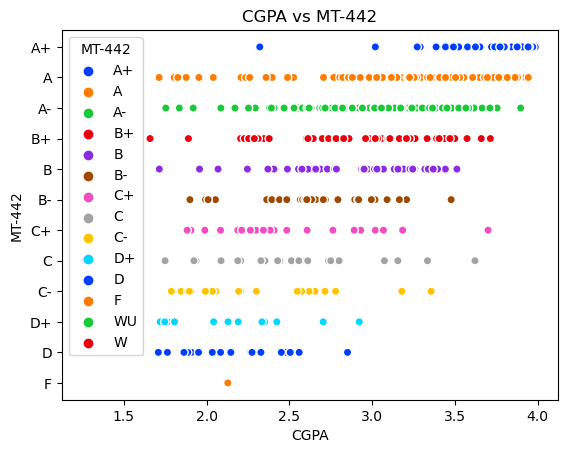

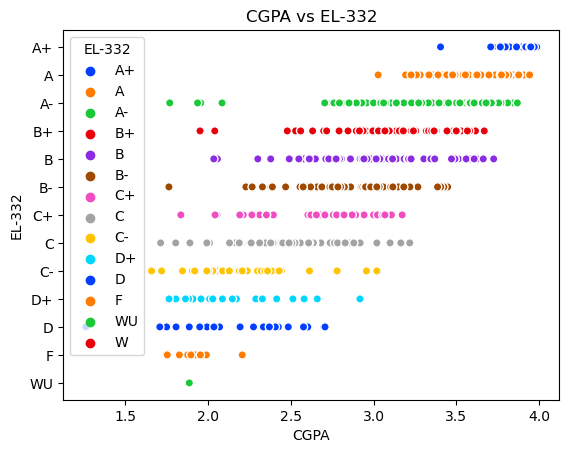

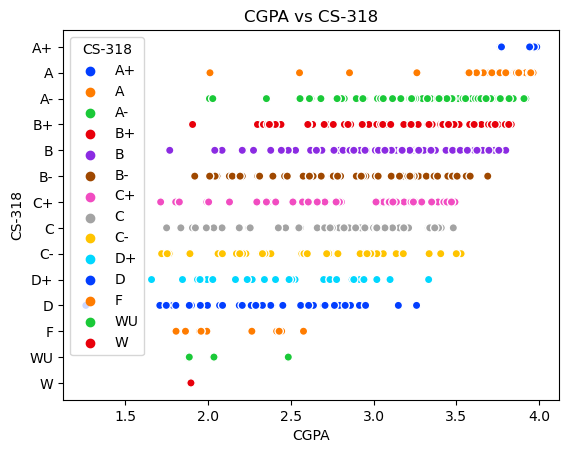

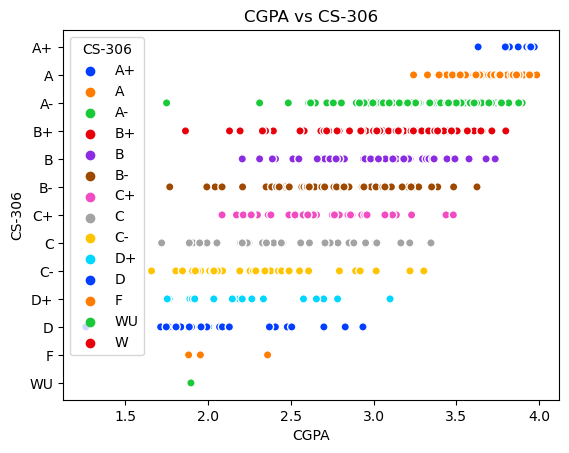

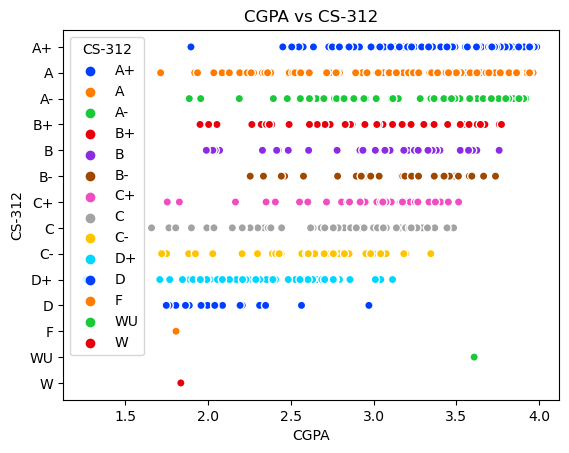

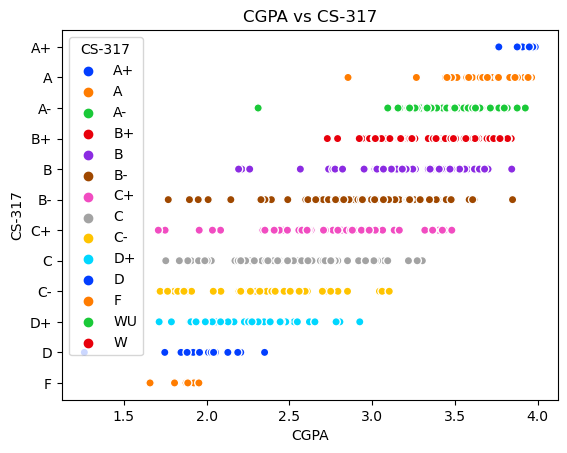

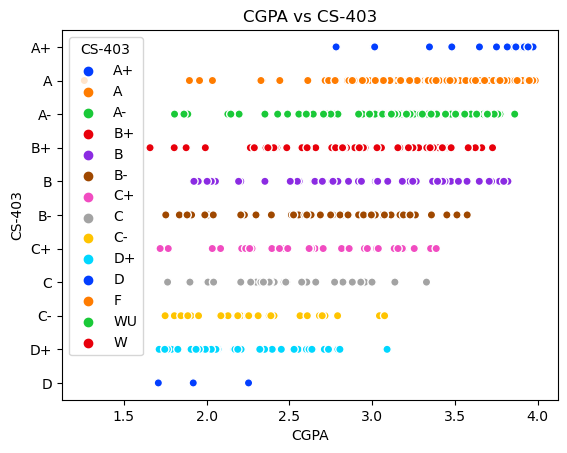

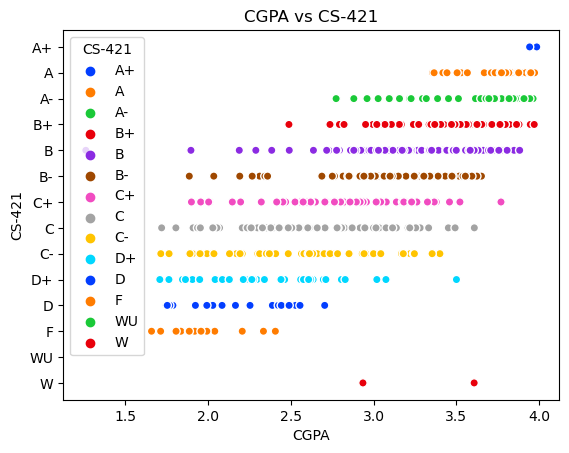

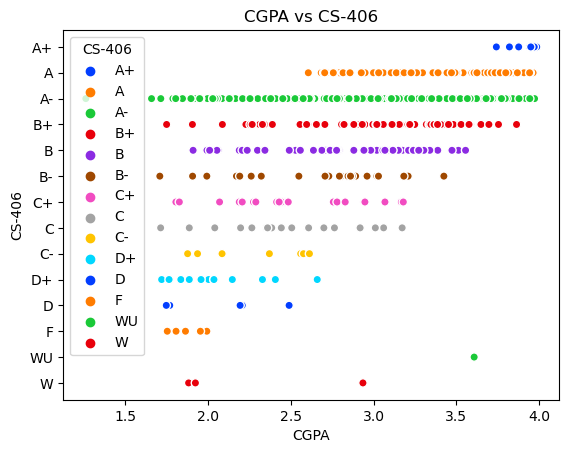

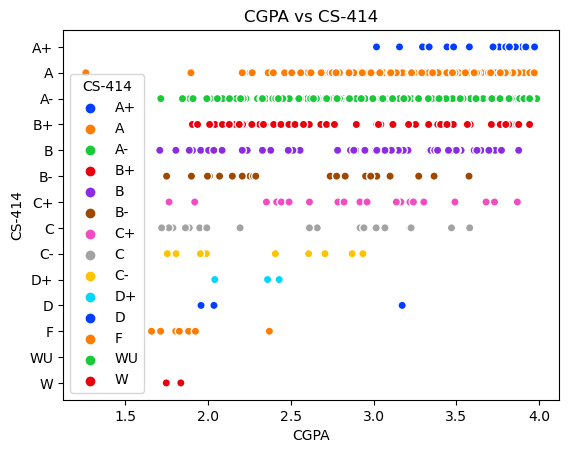

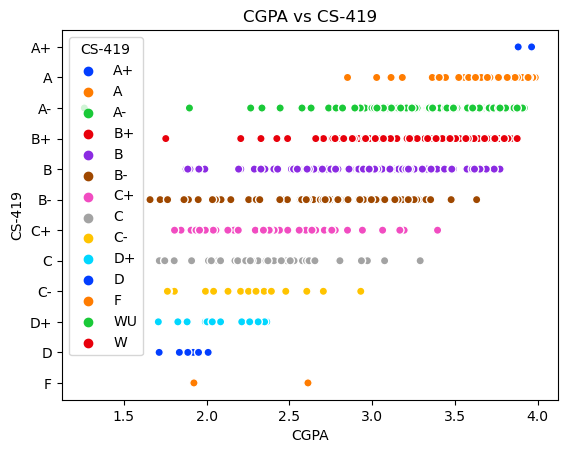

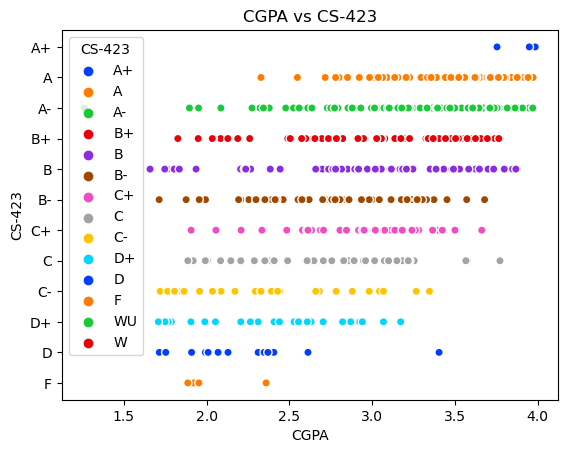

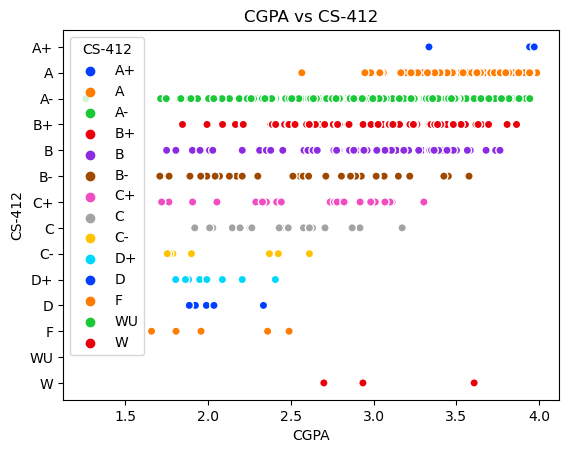

In [36]:
for col in categorical_column:
    sns.scatterplot(x='CGPA',y=f"{col}",hue=f"{col}",data=df,linewidth=1,palette='bright')
    plt.ylabel(f"{col}")
    plt.title(f"CGPA vs {col}")
    plt.show()

**Each plot describes,how a grades affects the CGPA value**

# Encoding

In [39]:
OE=OrdinalEncoder()

for i in categorical_column:
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
    
df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     6.0    10.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[561 rows x 42 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     561 non-null    float64
 1   HS-101     561 non-null    float64
 2   CY-105     561 non-null    float64
 3   HS-105/12  561 non-null    float64
 4   MT-111     561 non-null    float64
 5   CS-105     561 non-null    float64
 6   CS-106     561 non-null    float64
 7   EL-102     561 non-null    float64
 8   EE-119     561 non-null    float64
 9   ME-107     561 non-null    float64
 10  CS-107     561 non-null    float64
 11  HS-205/20  561 non-null    float64
 12  MT-222     561 non-null    float64
 13  EE-222     561 non-null    float64
 14  MT-224     561 non-null    float64
 15  CS-210     561 non-null    float64
 16  CS-211     561 non-null    float64
 17  CS-203     561 non-null    float64
 18  CS-214     561 non-null    float64
 19  EE-217     561 non-null    float64
 20  CS-212     561 

**After Encoding the datatype have been changed**

# Multivariate Analysis

# Correalation Between independent variable and target variable

In [41]:
df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.364662  0.542480   0.489461  0.457760  0.590384   
HS-101     0.364662  1.000000  0.318734   0.466245  0.429801  0.383307   
CY-105     0.542480  0.318734  1.000000   0.478800  0.519495  0.568184   
HS-105/12  0.489461  0.466245  0.478800   1.000000  0.475902  0.474835   
MT-111     0.457760  0.429801  0.519495   0.475902  1.000000  0.381212   
CS-105     0.590384  0.383307  0.568184   0.474835  0.381212  1.000000   
CS-106     0.278479  0.307744  0.349782   0.485935  0.491839  0.276018   
EL-102     0.408450  0.345745  0.421849   0.341497  0.543150  0.345009   
EE-119     0.580460  0.303358  0.484034   0.409673  0.403776  0.498891   
ME-107     0.526575  0.327945  0.462803   0.312481  0.462213  0.440830   
CS-107     0.471586  0.502361  0.451199   0.526392  0.468792  0.507680   
HS-205/20  0.289300  0.175735  0.238308   0.165138  0.316970  0.176427   
MT-222     0.562491  0.397886  0.488865   0.461679  0.499918  0.481531   
EE-222     0.551562  0.389994  0.423165   0.390964  0.401936  0.509679   
MT-224     0.352519  0.267045  0.462872   0.400780  0.578365  0.262957   
CS-210     0.518775  0.320298  0.503007   0.465133  0.582871  0.444559   
CS-211     0.330758  0.341461  0.457750   0.351412  0.559808  0.341297   
CS-203     0.467551  0.263625  0.392086   0.286507  0.515142  0.409914   
CS-214     0.410076  0.460450  0.456118   0.405390  0.586454  0.406419   
EE-217     0.427052  0.332679  0.388839   0.347970  0.520679  0.338811   
CS-212     0.355068  0.341184  0.436052   0.465238  0.575886  0.321446   
CS-215     0.493052  0.403469  0.532072   0.462283  0.586355  0.460635   
MT-331     0.224737  0.192493  0.419632   0.285221  0.479254  0.269991   
EF-303     0.233253  0.260642  0.390858   0.417683  0.446447  0.231212   
HS-304     0.465856  0.441408  0.378287   0.376659  0.346363  0.500632   
CS-301     0.335601  0.331199  0.418990   0.445205  0.574229  0.260676   
CS-302     0.482036  0.360221  0.509041   0.444393  0.537211  0.458363   
TC-383     0.237547  0.349655  0.369312   0.441173  0.542332  0.260645   
MT-442     0.469691  0.235440  0.467895   0.337331  0.425729  0.431416   
EL-332     0.455202  0.394341  0.391191   0.374887  0.607271  0.391187   
CS-318     0.487258  0.425836  0.367128   0.400547  0.408317  0.486345   
CS-306     0.510454  0.449423  0.403120   0.510591  0.508714  0.451801   
CS-312     0.065410  0.228937  0.298765   0.283881  0.509412  0.083275   
CS-317     0.476340  0.367613  0.494913   0.489800  0.572161  0.397862   
CS-403     0.368667  0.250034  0.525173   0.486041  0.455681  0.319673   
CS-421     0.327924  0.321463  0.403245   0.447928  0.548722  0.269655   
CS-406     0.301207  0.275355  0.151716   0.181047  0.318325  0.256310   
CS-414     0.187699  0.245779  0.044900   0.167917  0.256619  0.153554   
CS-419     0.503203  0.301938  0.484092   0.496238  0.536780  0.339665   
CS-423     0.119664  0.242951  0.153844   0.256895  0.429186  0.066309   
CS-412     0.316964  0.236217  0.085047   0.166924  0.287769  0.198109   
CGPA      -0.642891 -0.525553 -0.647309  -0.614840 -0.744468 -0.583631   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.278479  0.408450  0.580460  0.526575  ...  0.065410  0.476340   
HS-101     0.307744  0.345745  0.303358  0.327945  ...  0.228937  0.367613   
CY-105     0.349782  0.421849  0.484034  0.462803  ...  0.298765  0.494913   
HS-105/12  0.485935  0.341497  0.409673  0.312481  ...  0.283881  0.489800   
MT-111     0.491839  0.543150  0.403776  0.462213  ...  0.509412  0.572161   
CS-105     0.276018  0.345009  0.498891  0.440830  ...  0.083275  0.397862   
CS-106     1.000000  0.316386  0.286380  0.286875  ...  0.489331  0.427427   
EL-102     0.316386  1.000000  0.454893  0.460814  ...  0.338204  0.480480   
EE-119     0.286380  0.454893  1.000000  0.560468  ...  0.176641  0.454772   
ME-107     0.286875  0.460814  0.560468  1.000000 

In [43]:
#the correlation coefficients with the target variable

corr_df=df.corr().unstack().sort_values(ascending=False).reset_index()
corr_df.columns=['Feature A','Feature B','Corr coef']
corr_df[(corr_df['Feature A'])=='CGPA']

Feature A  Feature B  Corr coef
41        CGPA       CGPA   1.000000
1682      CGPA     CS-414  -0.445195
1685      CGPA  HS-205/20  -0.464272
1687      CGPA     CS-412  -0.509788
1689      CGPA     CS-312  -0.515231
1690      CGPA     CS-406  -0.515967
1693      CGPA     HS-101  -0.525553
1695      CGPA     CS-106  -0.541780
1696      CGPA     EF-303  -0.553021
1699      CGPA     CS-423  -0.578569
1701      CGPA     MT-331  -0.580357
1702      CGPA     CS-105  -0.583631
1704      CGPA  HS-105/12  -0.614840
1707      CGPA     EE-222  -0.617972
1708      CGPA     CS-403  -0.618561
1710      CGPA     CS-107  -0.628063
1712      CGPA     HS-304  -0.629328
1714      CGPA     MT-442  -0.629403
1716      CGPA     CS-318  -0.633704
1719      CGPA     PH-121  -0.642891
1720      CGPA     CY-105  -0.647309
1723      CGPA     EE-119  -0.650335
1725      CGPA     EL-102  -0.652520
1726      CGPA     CS-211  -0.653155
1729      CGPA     ME-107  -0.661765
1731      CGPA     TC-383  -0.662460
1732      CGPA     CS-203  -0.665671
1734      CGPA     CS-212  -0.670338
1736      CGPA     MT-222  -0.680938
1739      CGPA     EE-217  -0.684938
1740      CGPA     CS-421  -0.705442
1742      CGPA     CS-419  -0.710096
1744      CGPA     MT-224  -0.733665
1746      CGPA     CS-301  -0.733819
1748      CGPA     MT-111  -0.744468
1750      CGPA     CS-214  -0.750184
1753      CGPA     CS-302  -0.759602
1754      CGPA     CS-215  -0.761122
1757      CGPA     CS-306  -0.774143
1758      CGPA     EL-332  -0.795902
1760      CGPA     CS-210  -0.796970
1762      CGPA     CS-317  -0.799364

**Here is the list of the correlation coeeficients with the target variable**

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

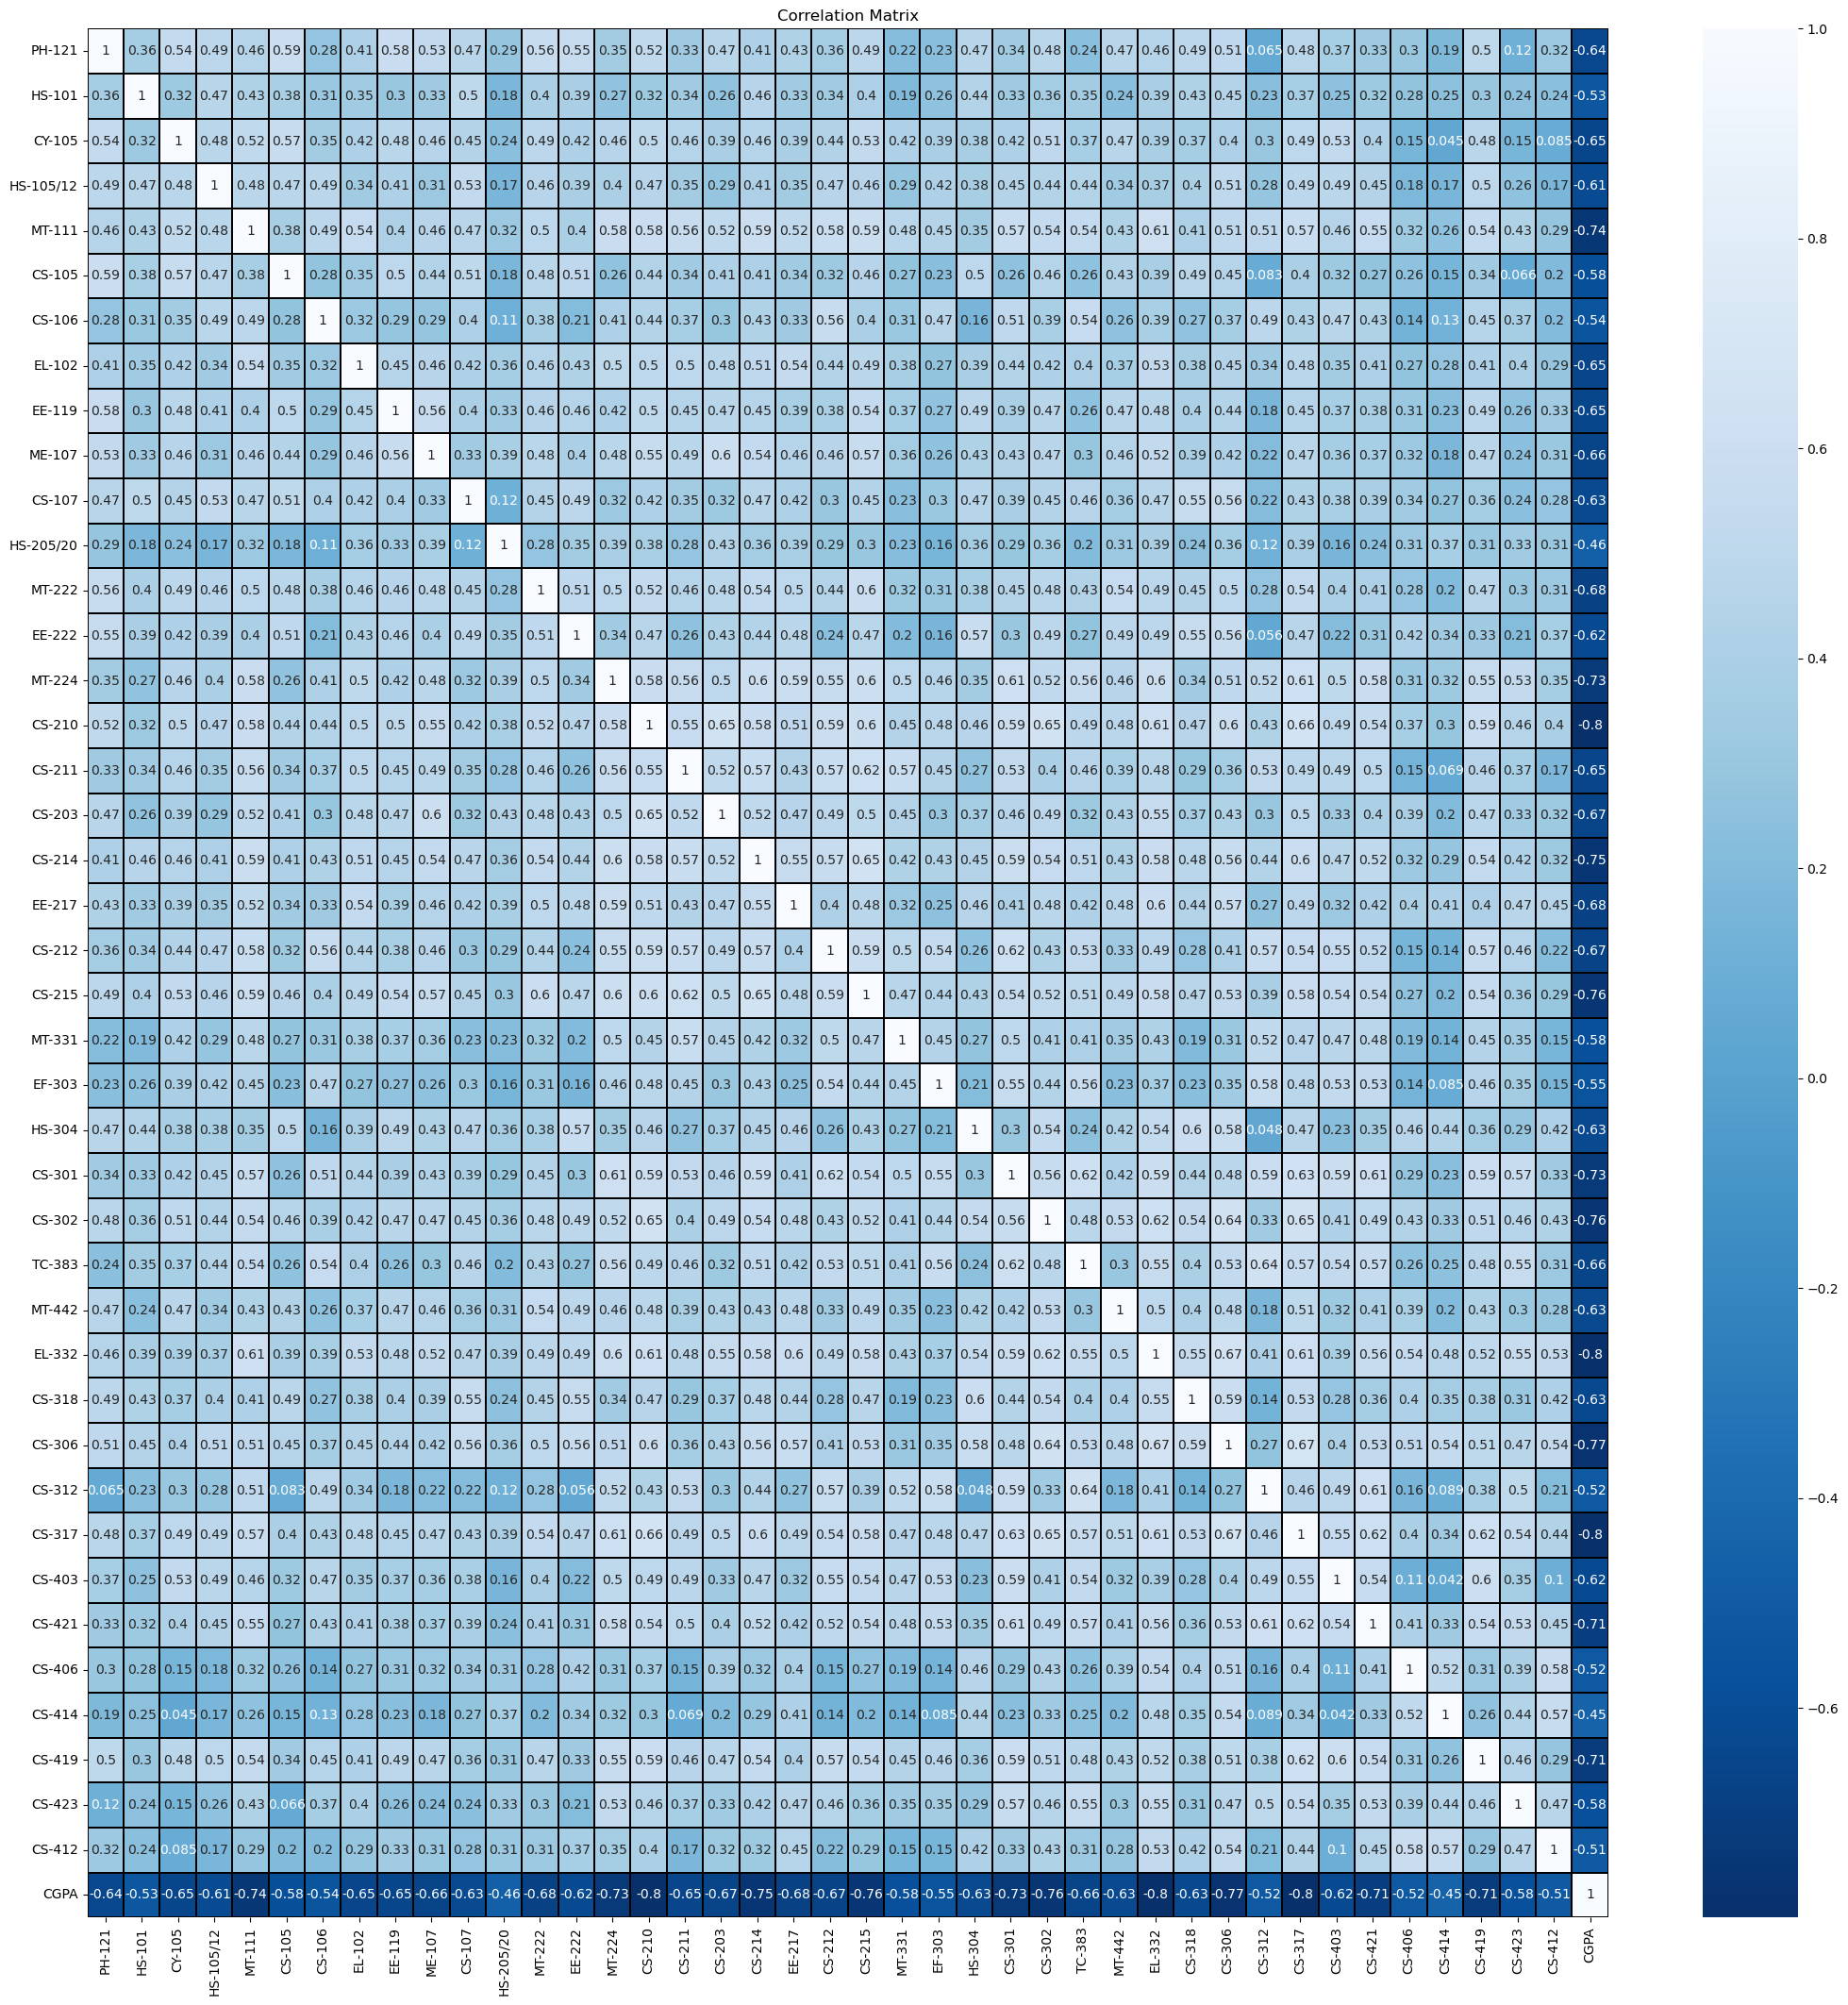

In [54]:
#Visiualise the correlation matrix by plotting heatmap

df_corr=df.corr()

lower_triangle=np.tril(df.corr())

plt.figure(figsize=(26,26))

sns.heatmap(df_corr,annot=True,cmap='Blues_r',linewidths=0.1,fmt='.2g',linecolor='black')
plt.title('Correlation Matrix')
plt.show()

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns,feature to feature columns**

**2)CGPA are negatively correlated with CS-317(-0.8),CS-210(-0.8) and EL-332(-0.8) which is close to 1(high correlation)**

# Preprocessing Data

# Removing outliers

In [55]:
z=np.abs(zscore(df))

z

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.438976  1.791629  1.833833   0.579679  1.425749  2.742611  1.845475   
1    1.238582  1.431248  2.538477   1.533346  0.397230  1.225997  1.845475   
2    1.238582  0.731041  0.984743   0.261791  0.054390  1.048924  0.348278   
3    1.781023  0.710485  2.538477   1.533346  1.768589  0.290617  2.219774   
4    0.567559  1.091423  0.280099   0.056098  1.316969  1.048924  0.774619   
..        ...       ...       ...        ...       ...       ...       ...   
566  0.232047  1.812186  0.984743   0.691875  0.974129  1.048924  0.774619   
567  0.903071  1.812186  0.984743   1.327653  1.316969  1.048924  1.523217   
568  0.232047  1.812186  0.280099   0.056098  1.316969  1.048924  1.523217   
569  1.238582  0.370660  2.186155   1.327653  1.768589  2.742611  0.348278   
570  0.774488  1.431248  2.186155   0.579679  0.740069  2.742611  0.400320   

       EL-102    EE-119    ME-107  ...    CS-312    CS-317    CS-403  \
0    1.391598  0.436767  1.056970  ...  1.160232  1.146757  1.526135   
1    1.313249  2.345071  1.379582  ...  1.756559  1.508789  0.851195   
2    0.039174  0.708215  0.878700  ...  0.330584  0.663403  1.173626   
3    1.391598  1.963410  0.734358  ...  1.756559  0.422693  2.201076   
4    0.039174  1.471537  0.878700  ...  0.265743  0.301371  0.176255   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.637037  1.089876  0.233477  ...  0.628747  1.025434  1.173626   
567  0.637037  1.471537  1.523923  ...  0.032421  0.301371  1.173626   
568  1.313249  1.471537  0.556088  ...  0.628747  0.663403  1.173626   
569  1.391598  0.436767  1.056970  ...  1.458396  0.663403  0.161216   
570  1.053492  0.818428  1.702193  ...  0.862069  0.422693  0.513725   

       CS-421    CS-406    CS-414    CS-419    CS-423    CS-412      CGPA  
0    0.941492  0.403208  0.976671  1.720779  0.357100  0.454995  1.301316  
1    1.307519  0.403208  1.024471  0.883522  0.712293  0.028864  1.633172  
2    0.209438  1.208188  0.976671  1.628248  0.713564  1.307256  1.062107  
3    0.941492  0.804263  0.224014  1.302150  1.068758  1.675657  1.804996  
4    0.156589  0.403208  0.976671  0.790991  0.713564  1.307256  0.792579  
..        ...       ...       ...       ...       ...       ...       ...  
566  1.986724  1.208188  0.624242  0.046266  0.357100  1.307256  1.382171  
567  1.986724  0.403208  0.224014  0.790991  0.712293  0.454995  1.338373  
568  0.522616  1.208188  1.424699  0.046266  0.713564  0.454995  0.829639  
569  0.941492  2.414224  1.424699  0.372363  0.355829  1.249527  1.321530  
570  1.307519  3.219204  2.225156  0.046266  1.781687  2.101788  2.062732  

[561 rows x 42 columns]

In [56]:
#Hre threshold=3

df=df[(z<3).all(axis=1)]

In [57]:
df.shape  #Dimension of the new dataset

(530, 42)

# Removing Skewness

**Skewness acceptable range -0.5 to +0.5**

In [58]:
df_skew=df.skew().sort_values(ascending=False).to_frame("Skewness")
df_skew[df_skew['Skewness']>0.5]

Skewness
CS-406     1.367645
CS-105     0.991985
CY-105     0.980346
CS-412     0.885447
CS-414     0.884408
MT-442     0.884137
EE-222     0.762129
EE-217     0.742184
CS-210     0.670396
MT-331     0.656624
CS-106     0.646286
PH-121     0.620171
CS-403     0.610797
CS-302     0.609750
EE-119     0.593578
HS-205/20  0.577228
EL-102     0.540545

In [61]:
skewness_columns=df_skew[df_skew['Skewness']>0.5].index.to_list()
skewness_columns=sorted(skewness_columns)
skewness_columns

['CS-105',
 'CS-106',
 'CS-210',
 'CS-302',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-119',
 'EE-217',
 'EE-222',
 'EL-102',
 'HS-205/20',
 'MT-331',
 'MT-442',
 'PH-121']

In [67]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skewness_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skewness_columns]], axis=1)

In [68]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^([A-Z]+-\d+)')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for PH-121
display(df_comp[df_comp['feature'] == 'PH-121'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness feature  Skewness_abs
0  PH-121_sqrt -0.389763  PH-121      0.389763
1   PH-121_log       NaN  PH-121           NaN
2  PH-121_cbrt -0.855826  PH-121      0.855826
3       PH-121  0.620171  PH-121      0.620171

index  Skewness feature  Skewness_abs
64  CS-105_sqrt -0.112609  CS-105      0.112609
63       CS-106  0.646286  CS-106      0.646286
56  CS-210_sqrt -0.544472  CS-210      0.544472
55       CS-302  0.609750  CS-302      0.609750
48  CS-403_sqrt -0.345887  CS-403      0.345887
44  CS-406_sqrt -0.449531  CS-406      0.449531
40  CS-412_sqrt -0.720285  CS-412      0.720285
36  CS-414_sqrt -0.152758  CS-414      0.152758
32  CY-105_sqrt -0.010579  CY-105      0.010579
31       EE-119  0.593578  EE-119      0.593578
24  EE-217_sqrt -0.482591  EE-217      0.482591
20  EE-222_sqrt -0.287220  EE-222      0.287220
16  EL-102_sqrt -0.492778  EL-102      0.492778
15    HS-205/20  0.577228  HS-205      0.577228
8   MT-331_sqrt -0.334061  MT-331      0.334061
4   MT-442_sqrt -0.213888  MT-442      0.213888
0   PH-121_sqrt -0.389763  PH-121      0.389763

In [69]:
# Searching the columns to update with the transform data
sqrt_columns = low_skewness[low_skewness['index'] != low_skewness['feature']] 
display(sqrt_columns)

# Delete row for column 'Hs-205' which should not be transformed
sqrt_columns = sqrt_columns[sqrt_columns['feature'] != 'HS-205']

# Obtain the columns to tranform
sqrt_columns= sqrt_columns['feature'].to_list()
sqrt_columns

index  Skewness feature  Skewness_abs
64  CS-105_sqrt -0.112609  CS-105      0.112609
56  CS-210_sqrt -0.544472  CS-210      0.544472
48  CS-403_sqrt -0.345887  CS-403      0.345887
44  CS-406_sqrt -0.449531  CS-406      0.449531
40  CS-412_sqrt -0.720285  CS-412      0.720285
36  CS-414_sqrt -0.152758  CS-414      0.152758
32  CY-105_sqrt -0.010579  CY-105      0.010579
24  EE-217_sqrt -0.482591  EE-217      0.482591
20  EE-222_sqrt -0.287220  EE-222      0.287220
16  EL-102_sqrt -0.492778  EL-102      0.492778
15    HS-205/20  0.577228  HS-205      0.577228
8   MT-331_sqrt -0.334061  MT-331      0.334061
4   MT-442_sqrt -0.213888  MT-442      0.213888
0   PH-121_sqrt -0.389763  PH-121      0.389763

['CS-105',
 'CS-210',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-217',
 'EE-222',
 'EL-102',
 'MT-331',
 'MT-442',
 'PH-121']

In [70]:
#Update the df with the transfer data with sqaure root method.
for col in sqrt_columns:
    df[col]=np.sqrt(df[col])

In [71]:
df.skew()  #Update of the skewness after transformation method

PH-121      -0.389763
HS-101       0.089323
CY-105      -0.010579
HS-105/12    0.346408
MT-111       0.485400
CS-105      -0.112609
CS-106       0.646286
EL-102      -0.492778
EE-119       0.593578
ME-107       0.125256
CS-107       0.442812
HS-205/20    0.577228
MT-222       0.210759
EE-222      -0.287220
MT-224       0.440454
CS-210      -0.544472
CS-211       0.095155
CS-203       0.293761
CS-214       0.039378
EE-217      -0.482591
CS-212       0.419938
CS-215       0.154200
MT-331      -0.334061
EF-303       0.350413
HS-304       0.454082
CS-301       0.424709
CS-302       0.609750
TC-383       0.363718
MT-442      -0.213888
EL-332       0.452344
CS-318       0.341830
CS-306       0.436849
CS-312       0.442619
CS-317       0.154627
CS-403      -0.345887
CS-421       0.094511
CS-406      -0.449531
CS-414      -0.152758
CS-419       0.455225
CS-423       0.490826
CS-412      -0.720285
CGPA        -0.383135
dtype: float64

# Separting features and labels(to build model)

In [72]:
x=df.drop('CGPA',axis=1)
y=df['CGPA']

In [73]:
print("Feature Dimension",x.shape)
print("label Dimension",y.shape)

Feature Dimension (530, 41)
label Dimension (530,)


# Checking Variance inflation factor (VIF)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif.sort_values(by='VIF values',ascending=False)

VIF values   features
35   12.823666     CS-421
33   12.489840     CS-317
15   11.276027     CS-210
20   10.651567     CS-212
18   10.250248     CS-214
21   10.036742     CS-215
25    9.749571     CS-301
24    9.680682     HS-304
40    9.564056     CS-412
31    9.547637     CS-306
32    9.375585     CS-312
16    9.237993     CS-211
38    9.165252     CS-419
29    8.990999     EL-332
30    8.886318     CS-318
23    8.556196     EF-303
19    8.318530     EE-217
0     8.285752     PH-121
27    8.046166     TC-383
14    8.041968     MT-224
26    7.896308     CS-302
9     7.674223     ME-107
36    7.636489     CS-406
34    7.586787     CS-403
39    7.544269     CS-423
17    7.369745     CS-203
1     7.364718     HS-101
7     7.177397     EL-102
13    7.024570     EE-222
4     6.999744     MT-111
12    6.838263     MT-222
22    6.662647     MT-331
8     6.620538     EE-119
28    6.409329     MT-442
3     6.385466  HS-105/12
2     6.358717     CY-105
6     6.345389     CS-106
5     6.027823     CS-105
10    5.809890     CS-107
37    5.004315     CS-414
11    4.418658  HS-205/20

**If VIF value is greater than 10,consider it as a sign of multicollinearity ,here CS-421,CS-317,CS-210,CS-212,CS-214,CS-215 have the VIF values greter than 10,we will drop any one of the column first then again checking VIF values ,if it again repeats we will drop anathor one**

In [79]:
#Dropping the columns with multicollinearity
x=x.drop([ 'CS-421','CS-317','CS-210','CS-212','CS-214' ],axis=1)

**We will check VIF value after dropping first five high Multicorrelation because CS-215 close to 9 so we will drop first five and check**

In [80]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif.sort_values(by='VIF values',ascending=False)

VIF values   features
21    9.560219     HS-304
22    9.426931     CS-301
18    9.384601     CS-215
35    9.105049     CS-412
26    8.960218     EL-332
15    8.932135     CS-211
28    8.855110     CS-306
33    8.782530     CS-419
27    8.751875     CS-318
29    8.602404     CS-312
20    8.247801     EF-303
0     8.202628     PH-121
17    8.192798     EE-217
24    7.978959     TC-383
14    7.941664     MT-224
9     7.568817     ME-107
23    7.526505     CS-302
31    7.387847     CS-406
30    7.337012     CS-403
34    7.259577     CS-423
1     7.149691     HS-101
7     7.113915     EL-102
4     6.949102     MT-111
16    6.946841     CS-203
13    6.884789     EE-222
12    6.745609     MT-222
19    6.619429     MT-331
8     6.558970     EE-119
25    6.301710     MT-442
2     6.235545     CY-105
6     6.130461     CS-106
3     6.104495  HS-105/12
5     5.966851     CS-105
10    5.670939     CS-107
32    4.893515     CS-414
11    4.309658  HS-205/20

**Multicollinearity issue has been solved now**

# Modeling

# Finding the best random state

In [81]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.9917148781271251 at random state 82


# Creating train test split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=maxRS)

# Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error and Random_mean_squared_error difference between R2 score and cross validation

In [83]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred)) #mean_absolute_error for test result
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred)) #Mean_Squared_Error for test result
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred))) # Random_mean_squared_error for test result
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

# LinearRegression

In [84]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [85]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:97.72%

================Test Result=============
R2_Score:99.17%

 Mean_Absolute_Error: 0.04353762161337044

 Mean_Squared_Error: 0.002745652980162967

 Random_mean_squared_error: 0.052398978808398236

 [0.97038661 0.98188832 0.96948217 0.96677713 0.96534135]

 0.9707751173230736

 Difference between R2_score and cross validation is: 0.020939760804051466


# RandomForestRegressor

In [86]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.24%

================Test Result=============
R2_Score:98.05%

 Mean_Absolute_Error: 0.06958933333333349

 Mean_Squared_Error: 0.006448894793333328

 Random_mean_squared_error: 0.08030501101010651

 [0.93214736 0.93894672 0.93810295 0.9434653  0.91766328]

 0.9340651215803606

 Difference between R2_score and cross validation is: 0.04647507060920597


# KNeighborsRegressor

In [88]:
clf=knn()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [89]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:96.76%

================Test Result=============
R2_Score:97.57%

 Mean_Absolute_Error: 0.07278666666666668

 Mean_Squared_Error: 0.008048504000000003

 Random_mean_squared_error: 0.08971345495520727

 [0.95805733 0.94232324 0.95179049 0.93958587 0.92439426]

 0.9432302376265731

 Difference between R2_score and cross validation is: 0.03248306736276918


# GradientBoostingRegressor

In [90]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [91]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.70%

================Test Result=============
R2_Score:97.43%

 Mean_Absolute_Error: 0.07014490266982776

 Mean_Squared_Error: 0.008503373135073409

 Random_mean_squared_error: 0.09221373615179795

 [0.9597174  0.96837085 0.96614103 0.95519724 0.95190603]

 0.960266510095259

 Difference between R2_score and cross validation is: 0.01407420839188489


# Ridge

In [ ]:
clf=Ridge()
clf.fit(x_train,y_train)

In [92]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.70%

================Test Result=============
R2_Score:97.43%

 Mean_Absolute_Error: 0.07014490266982776

 Mean_Squared_Error: 0.008503373135073409

 Random_mean_squared_error: 0.09221373615179795

 [0.95973665 0.96875153 0.96608684 0.9550844  0.95166563]

 0.960265010927704

 Difference between R2_score and cross validation is: 0.014075707559439876


# DecisionTreeRegressor

In [93]:
clf= DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [94]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:78.62%

 Mean_Absolute_Error: 0.20870000000000002

 Mean_Squared_Error: 0.0708581

 Random_mean_squared_error: 0.2661918481095918

 [0.79363966 0.8155461  0.79673031 0.68296195 0.73329831]

 0.7644352670316522

 Difference between R2_score and cross validation is: 0.02174747404238031


# SVR

In [95]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [96]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:98.48%

================Test Result=============
R2_Score:98.11%

 Mean_Absolute_Error: 0.06272629096926494

 Mean_Squared_Error: 0.006270424177958459

 Random_mean_squared_error: 0.07918600998887657

 [0.94608556 0.96834456 0.96588346 0.96201154 0.95529458]

 0.9595239398386971

 Difference between R2_score and cross validation is: 0.02155479484323497


# ExtraTreesRegressor

In [97]:
clf=ExtraTreesRegressor()
clf.fit(x_train,y_train)

ExtraTreesRegressor()

In [98]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:98.06%

 Mean_Absolute_Error: 0.06851299999999964

 Mean_Squared_Error: 0.006422939049999977

 Random_mean_squared_error: 0.08014324082541195

 [0.93739154 0.94957867 0.96297694 0.96179494 0.94319344]

 0.9509871054073287

 Difference between R2_score and cross validation is: 0.029631409315482804


# Checking Difference between r2_score and cross validation,the model GradientBoostingRegressor has lowest value so GradientBoostingRegressor is our best model.

# Hyperparameter Tuning

In [102]:
param={'n_estimators':[50,100,200],
      'learning_rate':[0.01,0.05,0.1],
      'max_depth':[3,4,5],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[2,4,6],
      'subsample':[0.6,0.7,0.8]}

In [103]:
gscv=GridSearchCV(GradientBoostingRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.7, 0.8]})

In [104]:
gscv.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200,
 'subsample': 0.6}

# Final Model

In [105]:
SGPP_model=GradientBoostingRegressor(learning_rate=0.05,
                                    max_depth=4,
                                    min_samples_leaf=4,
                                    min_samples_split=5,
                                    n_estimators=200,
                                    subsample=0.6)

In [106]:
SGPP_model.fit(x_train,y_train)
pred=SGPP_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

98.61634571303154


# Saving The Model

In [107]:
joblib.dump(SGPP_model,'Student grades prediction project.pkl')

['Student grades prediction project.pkl']

# Predicting the saved model

In [108]:
model=joblib.load('Student grades prediction project.pkl')

In [109]:
prediction=model.predict(x_test)
prediction

array([2.57292092, 2.61977827, 2.47628897, 3.83091616, 3.23595481,
       2.88307921, 3.17854753, 3.02911179, 3.6969728 , 3.49953245,
       3.65329717, 2.29219496, 3.89195717, 3.95793807, 2.73210357,
       3.51473428, 3.69137959, 2.99104947, 1.94175089, 3.8006633 ,
       2.7740552 , 2.6754028 , 2.43124136, 2.78355244, 2.79186741,
       2.69489702, 2.52780804, 3.44317257, 2.29624769, 3.54495878])

In [110]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["original"]=a
df

Predicted  original
0    2.572921     2.605
1    2.619778     2.621
2    2.476289     2.396
3    3.830916     3.844
4    3.235955     3.071
5    2.883079     2.756
6    3.178548     3.226
7    3.029112     2.960
8    3.696973     3.765
9    3.499532     3.479
10   3.653297     3.668
11   2.292195     2.228
12   3.891957     3.919
13   3.957938     3.985
14   2.732104     2.612
15   3.514734     3.473
16   3.691380     3.648
17   2.991049     2.984
18   1.941751     1.906
19   3.800663     3.798
20   2.774055     2.716
21   2.675403     2.595
22   2.431241     2.484
23   2.783552     2.749
24   2.791867     2.619
25   2.694897     2.644
26   2.527808     2.525
27   3.443173     3.443
28   2.296248     2.260
29   3.544959     3.586